# Stepwise linear regression example

**Example using the stepwise linear regression function in the stepAIC package**

### Stepwise

The **stepwise** function in the stepAIC module has the option to use either forward selection (default), backward selection, or all subsets of possible combinations for the optimum set of predictor variables as follows:

- Forward selection (default) starts with no predictors and adds predictors as long as it improves the model (reduces AIC or BIC, or increases adjusted rsquared)
- Backward selection starts with all predictors and removes predictors as long as it improves the model (reduces AIC or BIC, or increases adjusted rsquared)
- All subsets of possible combinations of predictor features to find the best of all possible models (up to 20 candidate predictors)

Either the AIC, BIC, or adjusted rsquared may be used as the criterion with forward, backward, or all subsets. In addition, there is an option to find all features with p-values less than a signficance threshold through backward elimination based only on the p-values of the coefficients. The stepwise algorithm also has the option (default) to remove any non-signficant predictors after either a forward, backward, or all subsets search using the AIC, BIC, or adjusted rsquared criterion.

This example uses the diabetes data set described in the following tutorial by sklearn:

https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_model_selection.html#sphx-glr-auto-examples-linear-model-plot-lasso-model-selection-py

Before running this notebook, first install the stepAIC module in your environment, if it is not already installed, using one of the following lines in the next cell:

In [24]:
# # Run the following commands to install stepAIC for the first time
# !pip install git+https://github.com/gjpelletier/stepAIC.git

# # Run the following commands to upgrade stepAIC to the latest versions
# !pip install git+https://github.com/gjpelletier/stepAIC.git --upgrade

In this example we will use the diabetes data set from sklearn

In [25]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True, as_frame=True)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In addition, we add some random features to the original data to better illustrate the feature selection performed by the Stepwise method.

In [26]:
import numpy as np
import pandas as pd

rng = np.random.RandomState(42)
n_random_features = 5
X_random = pd.DataFrame(
    rng.randn(X.shape[0], n_random_features),
    columns=[f"random_{i:02d}" for i in range(n_random_features)],
)
X = pd.concat([X, X_random], axis=1)
# # Show only a subset of the columns
# X[X.columns[::3]].head()
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,random_00,random_01,random_02,random_03,random_04
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,0.496714,-0.138264,0.647689,1.523030,-0.234153
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,-0.234137,1.579213,0.767435,-0.469474,0.542560
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,-0.463418,-0.465730,0.241962,-1.913280,-1.724918
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,1.465649,-0.225776,0.067528,-1.424748,-0.544383


Finally, we will use the **stepwise** function in stepAIC to perform stepwise regression. We will use the following otpions:

- criterion='bic': Use the Bayesian Information Criterion as the criterion
- standardize='on': standardize the X variables using sklearn.preprocessing StandardScaler
- direction='all': search all subsets of features for the best model

Fitting models for all 32768 subsets of features, this may take up to a minute, please wait ...


Best 10 subsets of features in model_outputs['step_features']:

|   Rank |     AIC |     BIC |   rsq_adj | Features                                 |
|-------:|--------:|--------:|----------:|:-----------------------------------------|
|      0 | 4792.26 | 4816.81 |  0.502997 | ['sex' 'bmi' 'bp' 's3' 's5']             |
|      1 | 4792.26 | 4816.81 |  0.502997 | ['sex' 'bmi' 'bp' 's3' 's5']             |
|      2 | 4788.6  | 4817.24 |  0.508193 | ['sex' 'bmi' 'bp' 's1' 's2' 's5']        |
|      3 | 4789.92 | 4818.56 |  0.506728 | ['sex' 'bmi' 'bp' 's1' 's4' 's5']        |
|      4 | 4790.12 | 4818.76 |  0.5065   | ['sex' 'bmi' 'bp' 's1' 's3' 's5']        |
|      5 | 4791.09 | 4819.73 |  0.505419 | ['sex' 'bmi' 'bp' 's2' 's3' 's5']        |
|      6 | 4793.18 | 4821.82 |  0.503078 | ['sex' 'bmi' 'bp' 's3' 's4' 's5']        |
|      7 | 4793.33 | 4821.97 |  0.5029   | ['sex' 'bmi' 'bp' 's3

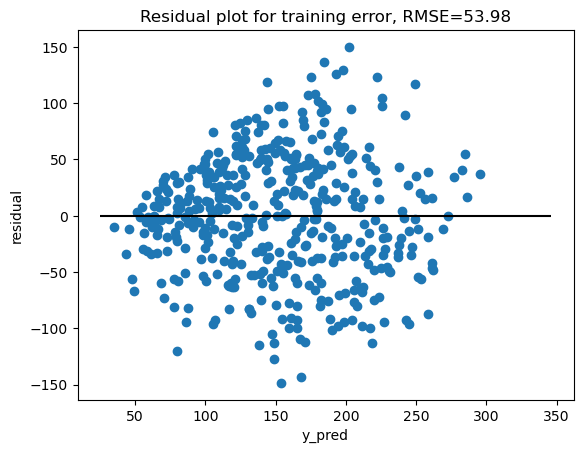

In [27]:
from stepAIC import stepwise

model_objects, model_outputs = stepwise(X, y, criterion='bic', direction='all', standardize='on')